<a href="https://colab.research.google.com/github/practice-grounds-wpaarth24/CNN/blob/main/CNN_ImageClassification(Multiclass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip"
urllib.request.urlretrieve(url, "10_food_classes_all_data.zip")

('10_food_classes_all_data.zip', <http.client.HTTPMessage at 0x250c25689e0>)

In [49]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [1]:
import urllib.request
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip"
urllib.request.urlretrieve(url, "10_food_classes_10_percent.zip")

('10_food_classes_10_percent.zip', <http.client.HTTPMessage at 0x1909fc43bf0>)

In [2]:
import zipfile
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

In [9]:
import os
import pathlib
import numpy as np

data_dir = pathlib.Path("10_food_classes_all_data/train")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(directory):
  rand_index = random.randint(0, 9)
  class_names[rand_index]
  folder = directory + class_names[rand_index]
  img_path = random.choice(os.listdir(folder))
  img = mpimg.imread(folder + "/" + img_path)
  plt.imshow(img)
  plt.title(class_names[rand_index])
  plt.axis("off")
  return img

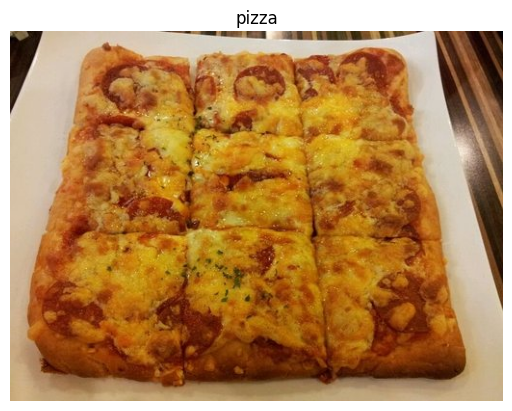

In [62]:
img = view_random_image("10_food_classes_all_data/train/")

In [64]:
img.shape

(384, 512, 3)

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_dir = "10_food_classes_all_data/train"
valid_dir = "10_food_classes_all_data/test"

train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)


In [77]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=25,
                                               class_mode="categorical")
valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(224, 224),
                                               batch_size=25,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [78]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2, padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
 ])

In [79]:
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [80]:
model.fit(train_data,
          epochs=10,
          validation_data=valid_data)

Epoch 1/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 151s 494ms/step - accuracy: 0.1326 - loss: 2.2942 - val_accuracy: 0.2068 - val_loss: 2.1489
Epoch 2/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 90s 297ms/step - accuracy: 0.3080 - loss: 1.9639 - val_accuracy: 0.3028 - val_loss: 1.9935
Epoch 3/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 81s 269ms/step - accuracy: 0.4805 - loss: 1.5099 - val_accuracy: 0.2868 - val_loss: 2.0295
Epoch 4/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 301ms/step - accuracy: 0.7008 - loss: 0.9089 - val_accuracy: 0.2612 - val_loss: 2.8106
Epoch 5/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 90s 299ms/step - accuracy: 0.8798 - loss: 0.3980 - val_accuracy: 0.2632 - val_loss: 3.5261
Epoch 6/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 87s 289ms/step - accuracy: 0.9611 - loss: 0.1550 - val_accuracy: 0.2540 - val_loss: 4.7572
Epoch 7/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 96s 317ms/step - accuracy: 0.9846 - loss: 0.0667 - val_accuracy: 0.2372 - val_loss: 5.7217
Epoch 8/10
300/300 ━━━━━━━━━━━━━━━━━━━━ 91s 302ms/step - accuracy: 0.9878 - loss: 

In [81]:
model.evaluate(valid_data)

100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 115ms/step - accuracy: 0.2365 - loss: 7.4463


[7.23234748840332, 0.23880000412464142]